# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from tabulate import tabulate

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df_gk = pd.read_csv("https://raw.githubusercontent.com/sendhy12/Dataset-Kesejahteraan-Pekerja-Indonesia/refs/heads/main/garisKemiskinan.csv")
df_min_upah = pd.read_csv("https://raw.githubusercontent.com/sendhy12/Dataset-Kesejahteraan-Pekerja-Indonesia/refs/heads/main/minUpah.csv")
df_pengeluaran = pd.read_csv("https://raw.githubusercontent.com/sendhy12/Dataset-Kesejahteraan-Pekerja-Indonesia/refs/heads/main/pengeluaran.csv")
df_rata_upah = pd.read_csv("https://raw.githubusercontent.com/sendhy12/Dataset-Kesejahteraan-Pekerja-Indonesia/refs/heads/main/rataRataUpah.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

##Struktur data

### garis kemiskinan

In [ ]:
df_gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


In [ ]:
df_gk.describe(include="all")

,provinsi,jenis,daerah,tahun,periode,gk
count,5460,5460,5460,5460.000000,5460,5261.000000
unique,35,3,3,NaN,2,NaN
top,ACEH,TOTAL,PERKOTAAN,NaN,MARET,NaN
freq,156,2100,1820,NaN,2730,NaN
mean,NaN,NaN,NaN,2018.115385,NaN,303904.185516
std,NaN,NaN,NaN,2.577159,NaN,158176.024903
min,NaN,NaN,NaN,2013.000000,NaN,48561.000000
25%,NaN,NaN,NaN,2016.000000,NaN,144674.000000
50%,NaN,NaN,NaN,2018.000000,NaN,313294.000000
75%,NaN,NaN,NaN,2020.000000,NaN,410188.000000


### minimal upah

In [ ]:
df_min_upah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ KB


In [ ]:
df_min_upah.describe(include="all")

,provinsi,tahun,ump
count,735,735.000000,7.110000e+02
unique,35,NaN,NaN
top,ACEH,NaN,NaN
freq,21,NaN,NaN
mean,NaN,2012.000000,1.402290e+06
std,NaN,6.059424,8.762622e+05
min,NaN,2002.000000,2.450000e+05
25%,NaN,2007.000000,6.639865e+05
50%,NaN,2012.000000,1.125207e+06
75%,NaN,2017.000000,2.074002e+06


### Pengeluaran

In [ ]:
df_pengeluaran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


In [ ]:
df_pengeluaran.describe(include="all")

,provinsi,daerah,jenis,tahun,peng
count,4620,4620,4620,4620.000000,4.512000e+03
unique,35,3,3,NaN,NaN
top,ACEH,PERDESAAN,MAKANAN,NaN,NaN
freq,132,1680,1540,NaN,NaN
mean,NaN,NaN,NaN,2015.045455,6.012012e+05
std,NaN,NaN,NaN,4.416124,3.524052e+05
min,NaN,NaN,NaN,2007.000000,5.921600e+04
25%,NaN,NaN,NaN,2011.750000,3.476272e+05
50%,NaN,NaN,NaN,2015.000000,5.206945e+05
75%,NaN,NaN,NaN,2019.000000,7.577325e+05


### rata - rata upah

In [ ]:
df_rata_upah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  280 non-null    object
 1   tahun     280 non-null    int64 
 2   upah      280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


In [ ]:
df_rata_upah.describe(include="all")

,provinsi,tahun,upah
count,280,280.00000,280.000000
unique,35,NaN,NaN
top,ACEH,NaN,NaN
freq,8,NaN,NaN
mean,NaN,2018.50000,16621.010714
std,NaN,2.29539,4371.803056
min,NaN,2015.00000,8525.000000
25%,NaN,2016.75000,13468.750000
50%,NaN,2018.50000,15845.000000
75%,NaN,2020.25000,18634.750000


## Missing Value

In [ ]:
dfs = {
    "df_gk": df_gk,
    "df_min_upah": df_min_upah,
    "df_pengeluaran": df_pengeluaran,
    "df_rata_upah": df_rata_upah
}

# Buat DataFrame untuk menampung jumlah missing values
missing_data = []

for name, df in dfs.items():
    missing_counts = df.isnull().sum()  # Hitung jumlah missing values per kolom
    missing_percent = (missing_counts / len(df)) * 100  # Hitung persentase missing values
    df_missing = pd.DataFrame({
        "DataFrame": name,
        "Kolom": missing_counts.index,
        "Jumlah Missing": missing_counts.values,
        "Persentase Missing (%)": missing_percent.values
    })
    missing_data.append(df_missing)

# Gabungkan hasil dari semua DataFrame
missing_summary = pd.concat(missing_data, ignore_index=True)

# Hanya tampilkan kolom yang memiliki missing values
missing_summary = missing_summary[missing_summary["Jumlah Missing"] > 0]

# Tampilkan hasil dalam bentuk tabel
print(missing_summary)

         DataFrame Kolom  Jumlah Missing  Persentase Missing (%)
5            df_gk    gk             199                3.644689
8      df_min_upah   ump              24                3.265306
13  df_pengeluaran  peng             108                2.337662


## Distribusi data

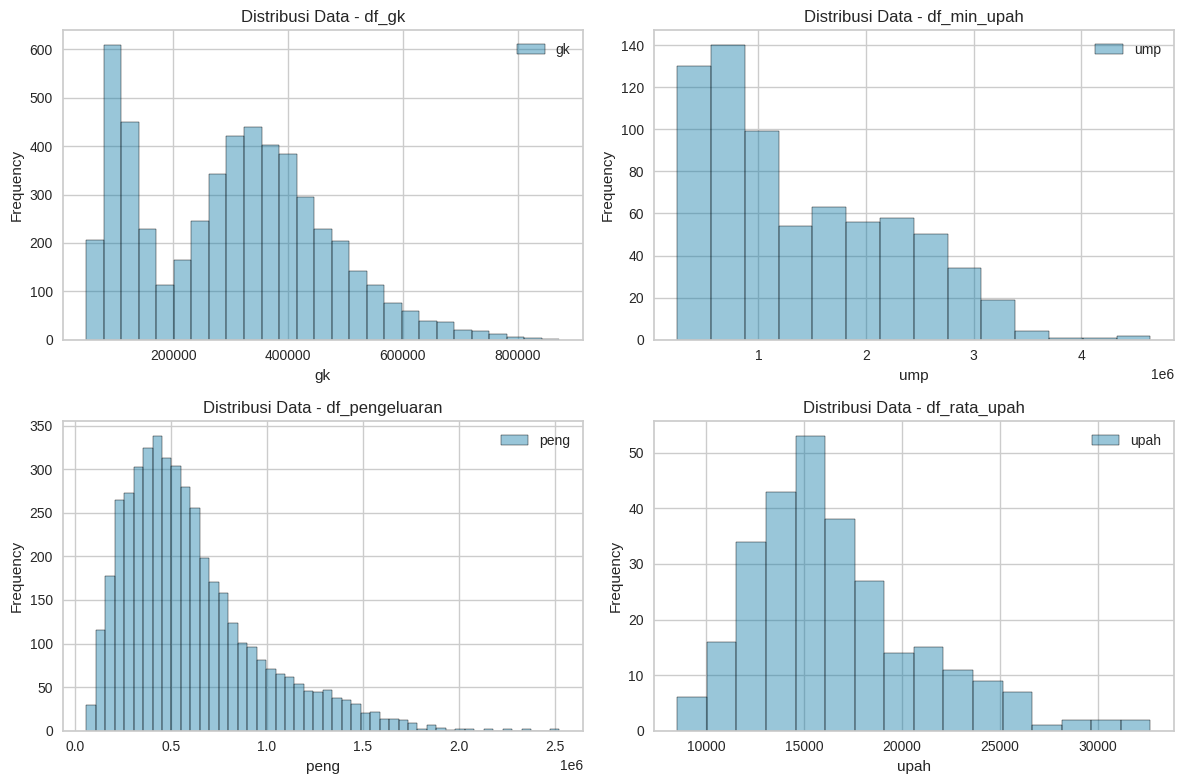

In [ ]:
selected_columns = {
    "df_gk": ["gk"],
    "df_min_upah": ["ump"],
    "df_pengeluaran": ["peng"],
    "df_rata_upah": ["upah"]
}

# Buat plot untuk setiap dataset
plt.figure(figsize=(12, 8))

for i, (name, df) in enumerate(dfs.items(), 1):
    plt.subplot(2, 2, i)
    cols_to_plot = selected_columns.get(name, [])

    for col in cols_to_plot:
        if col in df.columns:
            sns.histplot(df[col], label=col, fill=True, alpha=0.4)

    plt.title(f"Distribusi Data - {name}")
    plt.xlabel(col if cols_to_plot else "Nilai")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

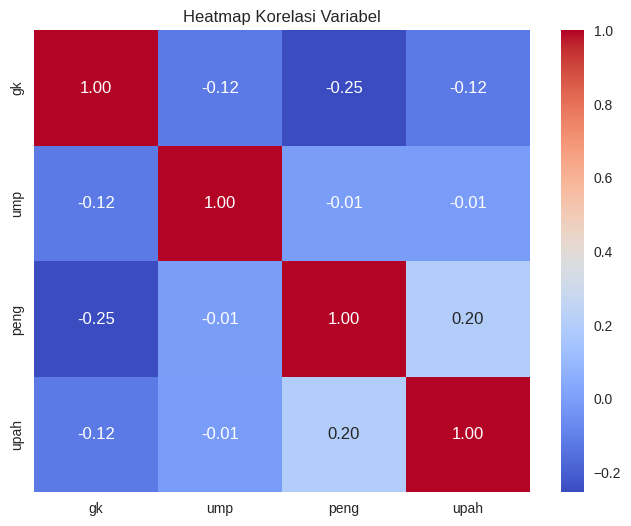

In [ ]:
# Menggabungkan dataset numerik untuk korelasi
df_merged = df_gk[['gk']].merge(df_min_upah[['ump']], left_index=True, right_index=True) \
                                       .merge(df_pengeluaran[['peng']], left_index=True, right_index=True) \
                                       .merge(df_rata_upah[['upah']], left_index=True, right_index=True)

# Membuat heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df_merged.corr(), annot=True, cmap="coolwarm", fmt=".2f", linecolor="black")
plt.title("Heatmap Korelasi Variabel")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
df_gk.drop(columns=['jenis', 'daerah'], inplace=True)
df_pengeluaran.drop(columns=['jenis', 'daerah'], inplace=True)

In [ ]:
# Fill missing values in df_garis_kemiskinan with median
df_gk['gk'].fillna(df_gk['gk'].median(), inplace=True)

# Fill missing values in df_min_upah with median
df_min_upah['ump'].fillna(df_min_upah['ump'].median(), inplace=True)

# Fill missing values in df_pengeluaran with median
df_pengeluaran['peng'].fillna(df_pengeluaran['peng'].median(), inplace=True)

<ipython-input-19-bd62fef14faa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gk['gk'].fillna(df_gk['gk'].median(), inplace=True)
<ipython-input-19-bd62fef14faa>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

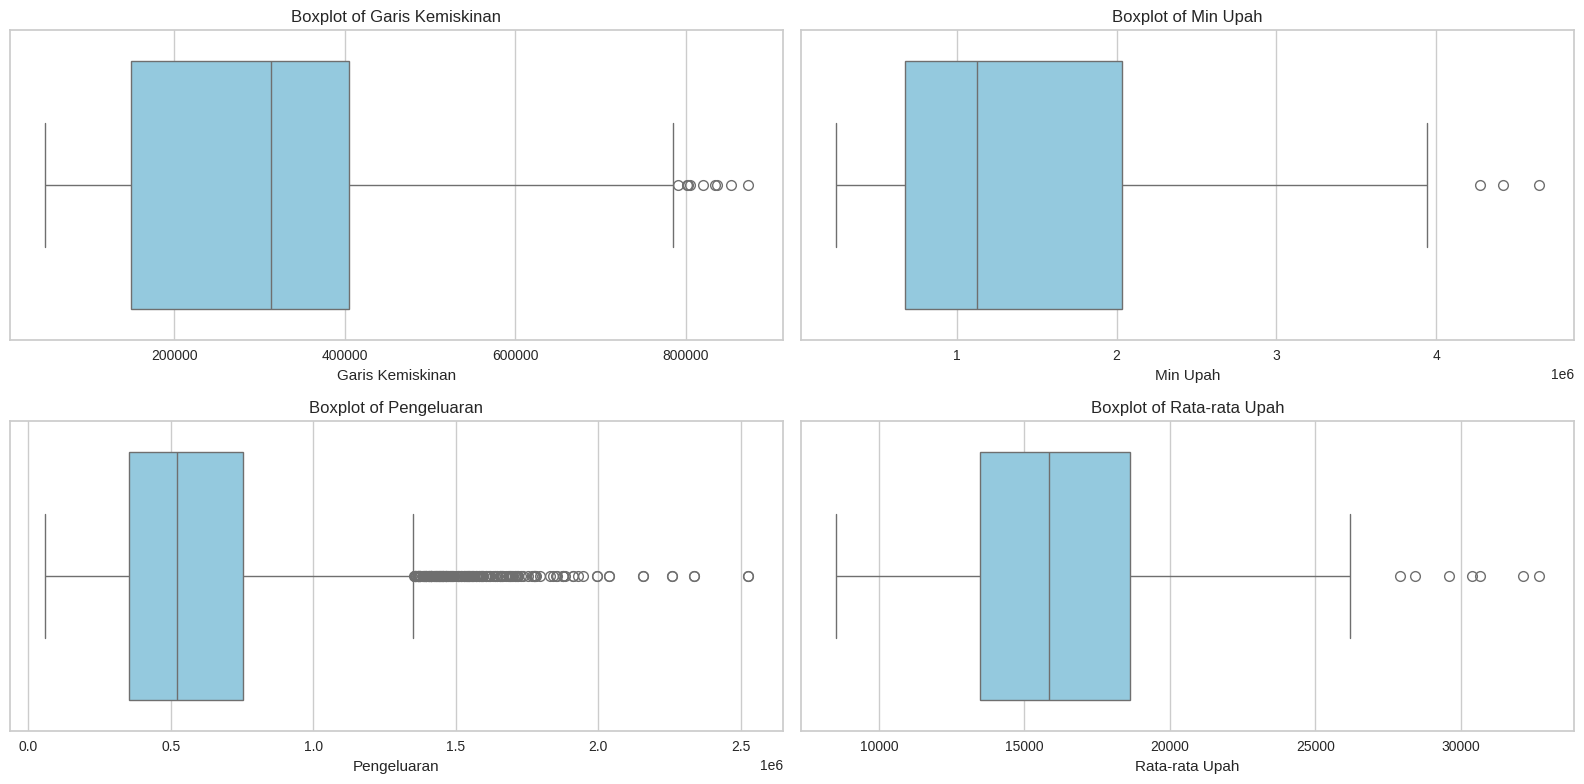

In [ ]:
plt.figure(figsize=(16, 8))
for i, (df, column, title) in enumerate(zip(
        [df_gk, df_min_upah, df_pengeluaran, df_rata_upah],
        ['gk', 'ump', 'peng', 'upah'],
        ['Garis Kemiskinan', 'Min Upah', 'Pengeluaran', 'Rata-rata Upah']), 1):

    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {title}')
    plt.xlabel(title)

plt.tight_layout()
plt.show()

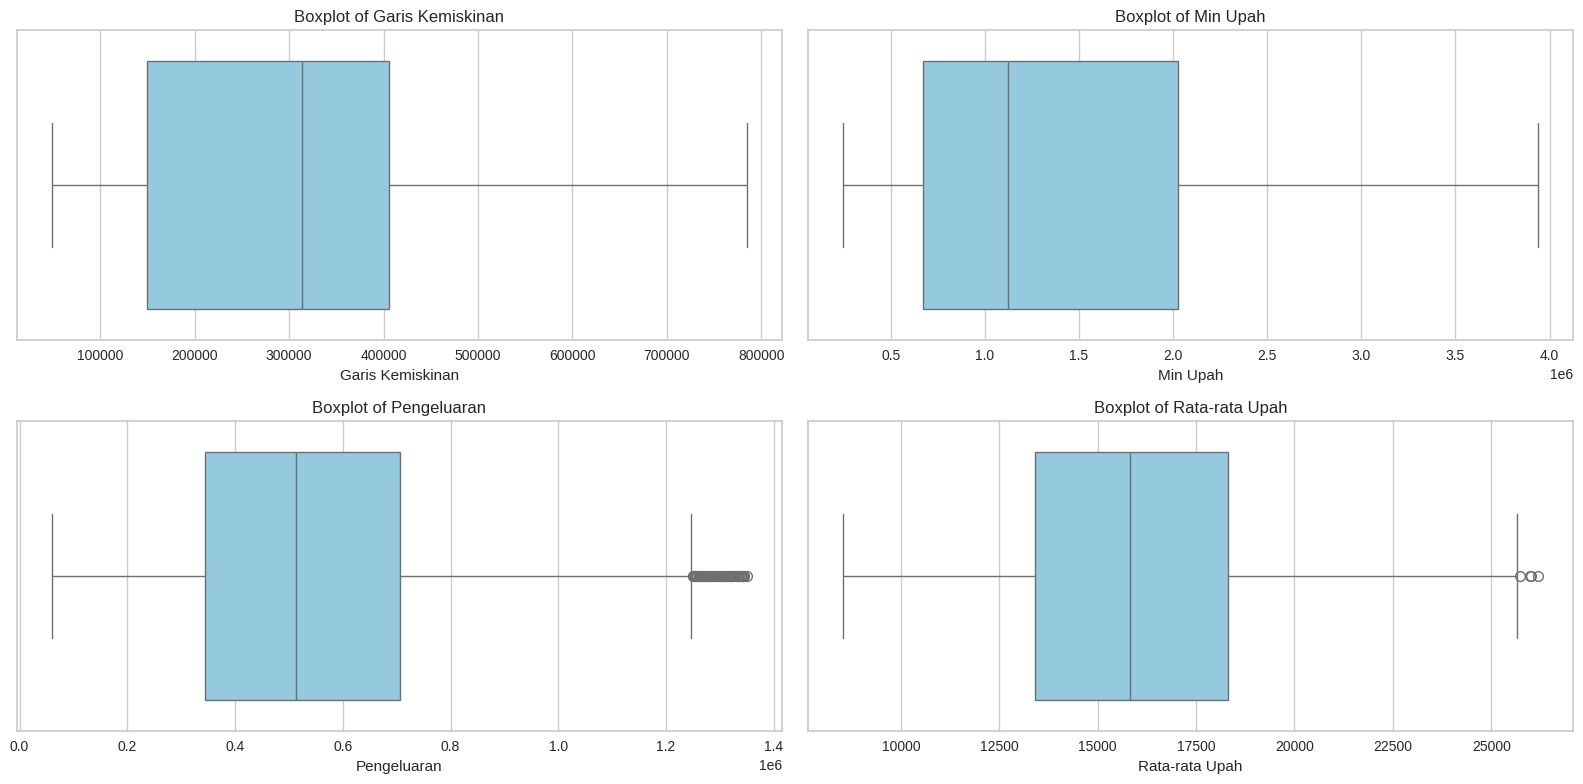

In [ ]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

# Membersihkan outlier dari setiap dataset
df_gk_clean = remove_outliers(df_gk, 'gk')
df_min_upah_clean = remove_outliers(df_min_upah, 'ump')
df_pengeluaran_clean = remove_outliers(df_pengeluaran, 'peng')
df_rata_upah_clean = remove_outliers(df_rata_upah, 'upah')

plt.figure(figsize=(16, 8))
for i, (df, column, title) in enumerate(zip(
        [df_gk_clean, df_min_upah_clean, df_pengeluaran_clean, df_rata_upah_clean],
        ['gk', 'ump', 'peng', 'upah'],
        ['Garis Kemiskinan', 'Min Upah', 'Pengeluaran', 'Rata-rata Upah']), 1):

    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {title}')
    plt.xlabel(title)

plt.tight_layout()
plt.show()

In [ ]:
merged_data = df_rata_upah_clean.merge(df_gk_clean, on=['provinsi', 'tahun']) \
                       .merge(df_min_upah_clean, on=['provinsi', 'tahun']) \
                       .merge(df_pengeluaran_clean, on=['provinsi', 'tahun'])

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40733 entries, 0 to 40732
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  40733 non-null  object 
 1   tahun     40733 non-null  int64  
 2   upah      40733 non-null  int64  
 3   periode   40733 non-null  object 
 4   gk        40733 non-null  float64
 5   ump       40733 non-null  float64
 6   peng      40733 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
merged_data

,provinsi,tahun,upah,periode,gk,ump,peng
0,ACEH,2015,11226,MARET,293697.0,1900000.0,395136.0
1,ACEH,2015,11226,MARET,293697.0,1900000.0,260183.0
2,ACEH,2015,11226,MARET,293697.0,1900000.0,655319.0
3,ACEH,2015,11226,MARET,293697.0,1900000.0,466355.0
4,ACEH,2015,11226,MARET,293697.0,1900000.0,529945.0
...,...,...,...,...,...,...,...
40728,INDONESIA,2022,17542,SEPTEMBER,535547.0,2729463.0,721083.0
40729,INDONESIA,2022,17542,SEPTEMBER,535547.0,2729463.0,828158.0
40730,INDONESIA,2022,17542,SEPTEMBER,535547.0,2729463.0,665756.0
40731,INDONESIA,2022,17542,SEPTEMBER,535547.0,2729463.0,662025.0


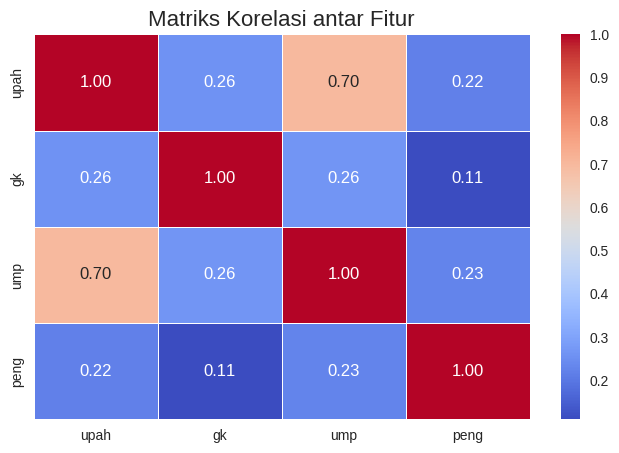

In [ ]:
#normalisasi/standarisasi data
num_cols = ['upah', 'gk', 'ump', 'peng']

selected_data = merged_data[num_cols]

scaler = RobustScaler()
scaled_data = scaler.fit_transform(selected_data)

plt.figure(figsize=(8, 5))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi antar Fitur", fontsize=16)
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Ambil 25% data secara acak
sampled_data = scaled_data[np.random.choice(scaled_data.shape[0], size=int(0.25 * len(scaled_data)), replace=False)]

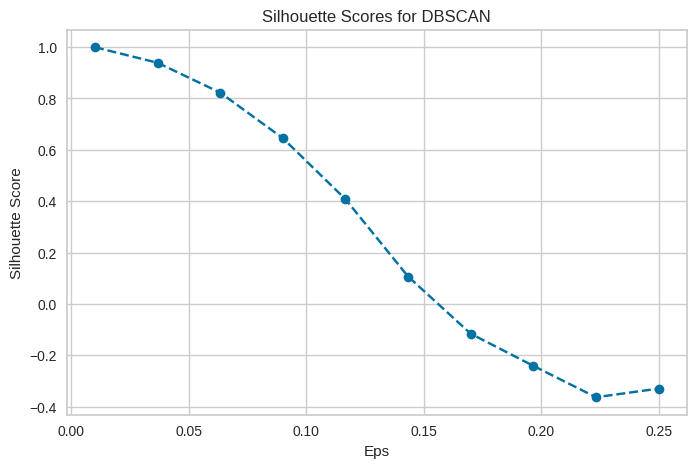

In [ ]:
eps_values = np.linspace(0.01, 0.25, 10)
dbscan_scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(sampled_data)
    valid_labels = labels[labels != -1]
    if len(set(valid_labels)) > 1:
        score = silhouette_score(sampled_data[labels != -1], valid_labels)
        dbscan_scores.append(score)
    else:
        dbscan_scores.append(-1)

plt.figure(figsize=(8, 5))
plt.plot(eps_values, dbscan_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for DBSCAN")
plt.xlabel("Eps")
plt.ylabel("Silhouette Score")
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Set nilai eps berdasarkan hasil k-distance plot (sekitar 0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)  # Melakukan clustering pada seluruh data


# Menghitung Silhouette Score hanya untuk data yang bukan outliers (label -1)
valid_labels = clusters[clusters != -1]  # Mengambil label selain -1 (outliers)
valid_data = scaled_data[clusters != -1]  # Mengambil data yang bukan outliers

# Pastikan ada lebih dari satu cluster yang valid
if len(set(valid_labels)) > 1:
    score = silhouette_score(valid_data, valid_labels)
    print(f"Silhouette Score: {score}")
else:
    print("Tidak cukup cluster yang valid untuk menghitung Silhouette Score.")

Silhouette Score: 0.7069716259118934


In [ ]:
kmeans_model = KMeans(n_clusters=2, random_state=0)
kmeans_model.fit(X)
labels = kmeans_model.labels_

df_clustered = df.copy()  # Salin dataset asli untuk menyimpan hasil cluster
df_clustered["Cluster"] = labels  # Menambahkan kolom cluster
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(df_clustered.head())  # Menampilkan 5 baris pertama dataset dengan label cluster

Silhouette Score: 0.585
      tahun        gk  provinsi  jenis  daerah  periode  Cluster
0 -1.207697 -0.062952         0      0       2        0        0
1 -1.207697 -0.008185         0      0       2        1        0
2 -0.819265  0.018546         0      0       2        0        0
3 -0.819265  0.106404         0      0       2        1        0
4 -1.207697 -0.038385         0      0       0        0        0


## **c. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


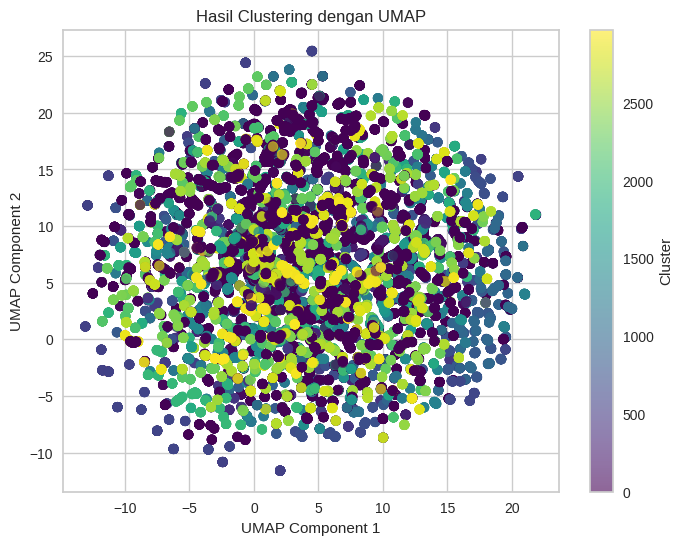

In [ ]:
from umap import UMAP

umap = UMAP(n_components=2, random_state=42)
data_umap = umap.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=clusters, cmap="viridis", alpha=0.6)
plt.title("Hasil Clustering dengan UMAP")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduksi dimensi ke 2D
pca = PCA(n_components=4)
data_pca = pca.fit_transform(scaled_data)  # Transform data ke 2D

# Normalisasi hasil PCA untuk mempermudah penentuan label kategori
pca_values = data_pca[:, 0]  # Ambil hanya satu komponen utama
thresholds = np.percentile(pca_values, [33, 67])  # Gunakan persentil untuk membagi menjadi 3 kelompok


In [ ]:
merged_data['avg_upah_per_bulan'] = merged_data['upah'] * 8 * 22
merged_data['cluster'] = clusters
valid_clusters_dbs = merged_data[merged_data['cluster'] != -1]

cluster_means_dbs = valid_clusters_dbs.groupby('cluster')[['ump', 'gk', 'avg_upah_per_bulan', 'peng']].mean()

def assign_category_based_on_cluster(cluster_mean):
    if (cluster_mean['ump'] < cluster_means_dbs['ump'].median() and
        cluster_mean['gk'] < cluster_means_dbs['gk'].median() and
        cluster_mean['avg_upah_per_bulan'] < cluster_means_dbs['avg_upah_per_bulan'].median() and
        cluster_mean['peng'] < cluster_means_dbs['peng'].median()):
        return 'Rendah'
    elif (cluster_mean['ump'] > cluster_means_dbs['ump'].median() and
          cluster_mean['gk'] > cluster_means_dbs['gk'].median() and
          cluster_mean['avg_upah_per_bulan'] > cluster_means_dbs['avg_upah_per_bulan'].median() and
          cluster_mean['peng'] > cluster_means_dbs['peng'].median()):
        return 'Tinggi'
    else:
        return 'Menengah'

merged_data['kategori_dbs'] = merged_data[merged_data['cluster'] != -1].apply(
    lambda row: assign_category_based_on_cluster(cluster_means_dbs.loc[row['cluster']]), axis=1
)

kategori_dbs_stats = merged_data.groupby('kategori_dbs')[['ump', 'gk', 'avg_upah_per_bulan', 'peng']].mean()

kategori_dbs_stats_formatted = kategori_dbs_stats.applymap(lambda x: f"{x:.2f}")
kategori_dbs_stats_formatted = kategori_dbs_stats_formatted.loc[['Rendah', 'Menengah', 'Tinggi']]
print(tabulate(kategori_dbs_stats_formatted, headers='keys', tablefmt='pretty'))

+--------------+------------+-----------+--------------------+-----------+
| kategori_dbs |    ump     |    gk     | avg_upah_per_bulan |   peng    |
+--------------+------------+-----------+--------------------+-----------+
|    Rendah    | 1605725.40 | 166208.46 |     2124945.19     | 426005.23 |
|   Menengah   | 2154319.49 | 260296.12 |     2702944.83     | 656653.10 |
|    Tinggi    | 2703605.79 | 411885.17 |     3321819.06     | 855198.39 |
+--------------+------------+-----------+--------------------+-----------+


<ipython-input-39-5af33836467a>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  kategori_dbs_stats_formatted = kategori_dbs_stats.applymap(lambda x: f"{x:.2f}")


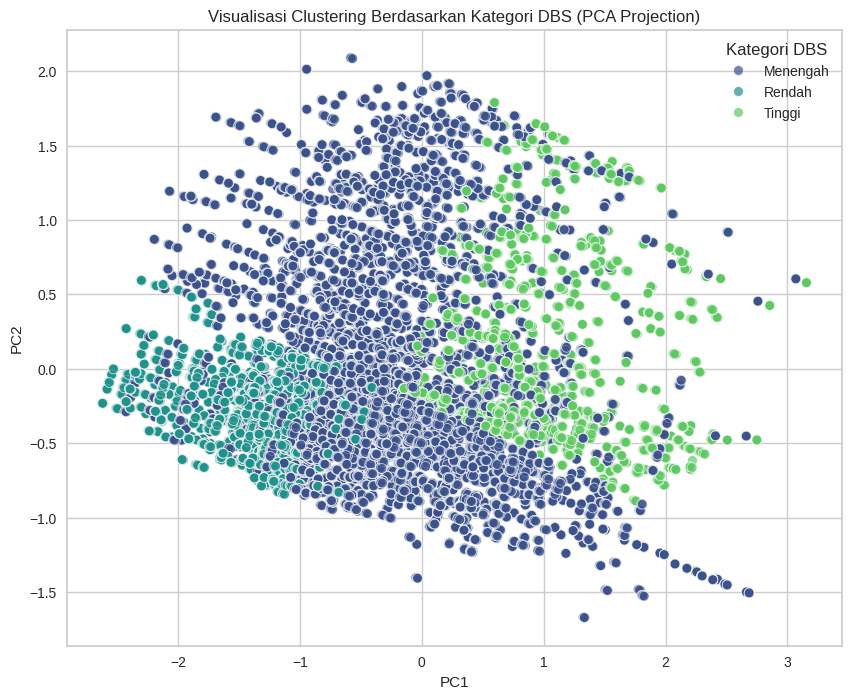

In [ ]:
# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_data)

# Menambahkan hasil PCA ke dalam dataframe
merged_data['PC1'] = pca_result[:, 0]
merged_data['PC2'] = pca_result[:, 1]

# Visualisasi clustering berdasarkan kategori_dbs
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_data, x='PC1', y='PC2', hue='kategori_dbs', palette='viridis', s=50, alpha=0.7)
plt.title('Visualisasi Clustering Berdasarkan Kategori DBS (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Kategori DBS')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

# Analisis Karakteristik Cluster dari Model DBSCAN

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model DBSCAN.

## Cluster 1: Rendah
- **Rata-rata UMP:** 1.605.725,40
- **Rata-rata Garis Kemiskinan (GK):** 166.208,46
- **Rata-rata Upah Per Bulan:** 2.124.945,19
- **Rata-rata Pengeluaran:** 426.005,23
- **Analisis:** Cluster ini mencakup wilayah dengan tingkat UMP dan upah per bulan yang relatif rendah. Pengeluaran masyarakat dalam cluster ini juga lebih rendah dibandingkan cluster lainnya. Hal ini menunjukkan bahwa daya beli di wilayah ini masih terbatas.

## Cluster 2: Menengah
- **Rata-rata UMP:** 2.154.319,49
- **Rata-rata Garis Kemiskinan (GK):** 260.296,12
- **Rata-rata Upah Per Bulan:** 2.702.944,83
- **Rata-rata Pengeluaran:** 656.653,10
- **Analisis:** Cluster ini menunjukkan wilayah dengan tingkat UMP dan upah per bulan yang lebih tinggi dibandingkan cluster rendah. Pengeluaran masyarakat di cluster ini juga lebih besar, yang mengindikasikan daya beli yang lebih baik.

## Cluster 3: Tinggi
- **Rata-rata UMP:** 2.703.605,79
- **Rata-rata Garis Kemiskinan (GK):** 411.885,17
- **Rata-rata Upah Per Bulan:** 3.321.819,06
- **Rata-rata Pengeluaran:** 855.198,39
- **Analisis:** Cluster ini mencakup wilayah dengan tingkat UMP, upah per bulan, dan pengeluaran yang paling tinggi dibandingkan cluster lainnya. Masyarakat dalam cluster ini memiliki daya beli yang kuat, yang menunjukkan perekonomian yang lebih stabil dan kesejahteraan yang lebih baik.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Hapus data yang belum memiliki label kategori
df_klasifikasi = merged_data.dropna(subset=['kategori_dbs'])

# Pilih hanya kolom yang kamu perlukan
kolom_penting = ['upah', 'gk', 'ump', 'peng', 'avg_upah_per_bulan', 'tahun', 'provinsi', 'kategori_dbs']
df_klasifikasi = df_klasifikasi[kolom_penting]

# Simpan ke CSV
df_klasifikasi.to_csv('data_klasifikasi_kesejahteraan.csv', index=False)